<a href="https://colab.research.google.com/github/MirasBaisbay/parkinsons-classification/blob/main/Parkinson's_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv("/content/pd_speech_features.csv")
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [3]:
df['class'].value_counts(normalize=True)

1    0.746032
0    0.253968
Name: class, dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [6]:
len(df.dropna()) / len(df)

# no missing values

1.0

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['class']), df['class'], test_size=0.25, random_state=2023,
                                                    stratify=df['class'])
print('stratify train: {:5.2f} test: {:5.2f}'.format(y_train.sum()/len(y_train), y_test.sum()/len(y_test)))

stratify train:  0.75 test:  0.75


In [9]:
from sklearn.ensemble import HistGradientBoostingClassifier
max_iter = 100
hist_grad = HistGradientBoostingClassifier(max_iter=max_iter, random_state=2023, verbose=1)
hist_grad.fit(X=X_train, y=y_train)
print('model classes: {}'.format(hist_grad.classes_))

Binning 0.003 GB of training data: 0.966 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 16 leaves, max depth = 8, in 0.058s
[2/100] 1 tree, 23 leaves, max depth = 12, in 0.064s
[3/100] 1 tree, 23 leaves, max depth = 12, in 0.057s
[4/100] 1 tree, 23 leaves, max depth = 12, in 0.057s
[5/100] 1 tree, 23 leaves, max depth = 10, in 0.059s
[6/100] 1 tree, 22 leaves, max depth = 9, in 0.053s
[7/100] 1 tree, 24 leaves, max depth = 11, in 0.071s
[8/100] 1 tree, 24 leaves, max depth = 10, in 0.063s
[9/100] 1 tree, 24 leaves, max depth = 11, in 0.063s
[10/100] 1 tree, 24 leaves, max depth = 9, in 0.061s
[11/100] 1 tree, 24 leaves, max depth = 8, in 0.074s
[12/100] 1 tree, 24 leaves, max depth = 9, in 0.058s
[13/100] 1 tree, 23 leaves, max depth = 11, in 0.061s
[14/100] 1 tree, 24 leaves, max depth = 11, in 0.059s
[15/100] 1 tree, 23 leaves, max depth = 11, in 0.056s
[16/100] 1 tree, 22 leaves, max depth = 7, in 0.086s
[17/100] 1 tree, 22 leaves, max depth = 10, in 0.063s
[18/100] 1 tree, 23 l

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=hist_grad.predict(X=X_test)))

              precision    recall  f1-score   support

           0       0.85      0.60      0.71        48
           1       0.88      0.96      0.92       141

    accuracy                           0.87       189
   macro avg       0.87      0.78      0.81       189
weighted avg       0.87      0.87      0.87       189



In [11]:
print(classification_report(y_true=y_test, y_pred=0 * y_test, zero_division=0))

              precision    recall  f1-score   support

           0       0.25      1.00      0.41        48
           1       0.00      0.00      0.00       141

    accuracy                           0.25       189
   macro avg       0.13      0.50      0.20       189
weighted avg       0.06      0.25      0.10       189



In [12]:
result_df = X_test.copy()
result_df['expected'] = y_test
result_df['observed'] = hist_grad.predict(X=X_test)
result_df['result'] = result_df['expected'].astype(str) + '/' + result_df['observed'].astype(str)
result_df['result'].value_counts()

1/1    136
0/0     29
0/1     19
1/0      5
Name: result, dtype: int64

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
fill_value = 0.0
n_estimators = 100
for strategy in ['mean', 'median', 'most_frequent', 'constant']:
    imputer = SimpleImputer(strategy=strategy, fill_value=fill_value, copy=True, )
    rand_forest = RandomForestClassifier(n_estimators=200, random_state=2023, verbose=1, )
    rand_forest.fit(X=imputer.fit_transform(X=X_train), y=y_train)
    y_pred = rand_forest.predict(X=imputer.fit_transform(X=X_test))
    print('strategy: {}'.format(strategy))
    print(classification_report(y_true=y_test, y_pred=y_pred))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


strategy: mean
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        48
           1       0.87      0.97      0.92       141

    accuracy                           0.87       189
   macro avg       0.87      0.78      0.81       189
weighted avg       0.87      0.87      0.86       189



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


strategy: median
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        48
           1       0.87      0.97      0.92       141

    accuracy                           0.87       189
   macro avg       0.87      0.78      0.81       189
weighted avg       0.87      0.87      0.86       189



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


strategy: most_frequent
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        48
           1       0.87      0.97      0.92       141

    accuracy                           0.87       189
   macro avg       0.87      0.78      0.81       189
weighted avg       0.87      0.87      0.86       189



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s


strategy: constant
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        48
           1       0.87      0.97      0.92       141

    accuracy                           0.87       189
   macro avg       0.87      0.78      0.81       189
weighted avg       0.87      0.87      0.86       189



[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [16]:
y_pred = hist_grad.predict(X_test).ravel()
y_test = y_test.ravel()
print(y_pred[:10])
print(y_test[:10])

[0 0 1 1 1 1 1 1 1 1]
[0 0 0 1 1 1 0 1 1 1]


<Axes: >

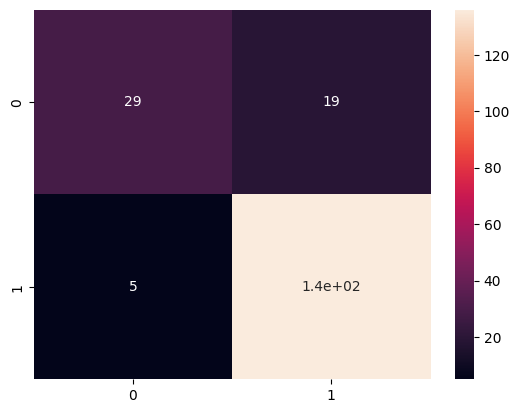

In [19]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [20]:
print(accuracy_score(y_test, y_pred))

0.873015873015873


In [40]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': randint(100, 500),
    'max_depth': randint(3, 10),
    'min_samples_leaf': randint(1, 5)
}

hist_grad = HistGradientBoostingClassifier(random_state=2023, verbose=1)

random_search = RandomizedSearchCV(estimator=hist_grad, param_distributions=param_dist, n_iter=10, cv=5, scoring='f1', verbose=1, random_state=2023, n_jobs=-1)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_

best_hist_grad = HistGradientBoostingClassifier(random_state=2023, verbose=1, **best_params)

best_hist_grad.fit(X_train, y_train)

y_pred = best_hist_grad.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Binning 0.003 GB of training data: 0.727 s
Fitting gradient boosted rounds:
[1/332] 1 tree, 11 leaves, max depth = 4, in 0.058s
[2/332] 1 tree, 16 leaves, max depth = 4, in 0.047s
[3/332] 1 tree, 16 leaves, max depth = 4, in 0.044s
[4/332] 1 tree, 16 leaves, max depth = 4, in 0.046s
[5/332] 1 tree, 16 leaves, max depth = 4, in 0.046s
[6/332] 1 tree, 14 leaves, max depth = 4, in 0.058s
[7/332] 1 tree, 14 leaves, max depth = 4, in 0.044s
[8/332] 1 tree, 14 leaves, max depth = 4, in 0.042s
[9/332] 1 tree, 16 leaves, max depth = 4, in 0.049s
[10/332] 1 tree, 14 leaves, max depth = 4, in 0.041s
[11/332] 1 tree, 14 leaves, max depth = 4, in 0.042s
[12/332] 1 tree, 14 leaves, max depth = 4, in 0.049s
[13/332] 1 tree, 14 leaves, max depth = 4, in 0.040s
[14/332] 1 tree, 14 leaves, max depth = 4, in 0.040s
[15/332] 1 tree, 16 leaves, max depth = 4, in 0.043s
[16/332] 1 tree, 14 leaves, max depth = 4, in 0.039s
[17/332] 1 tree, 15 leav

In [ ]:
#For class 0:

#Precision has improved from 0.83 to 0.88.
#Recall has increased from 0.62 to 0.96.
#The F1-score has significantly improved from 0.71 to 0.92.

#For class 1:

#Precision remains high at 0.88.
#Recall is still strong at 0.96.
#The F1-score is also high at 0.92.

<Axes: >

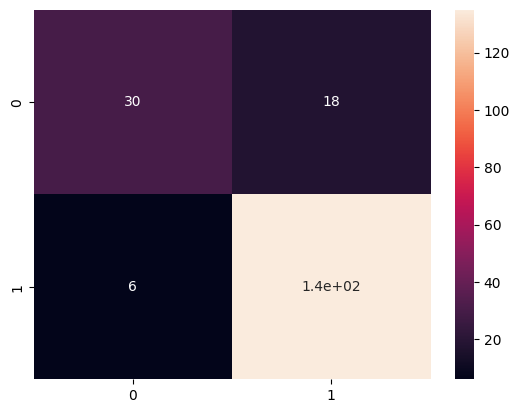

In [41]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [42]:
print(accuracy_score(y_test, y_pred))

0.873015873015873
